In [6]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter16_PCA'

Mounted at /content/gdrive/
/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter16_PCA


# PCA 1

## Import data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [8]:
df = pd.read_excel('Iris.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
features = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
x = df.loc[:, features].values

In [11]:
y = df.loc[:, ['iris']].values

In [12]:
# Scaler
x = StandardScaler().fit_transform(x)

In [13]:
pd.DataFrame(data = x, columns = features).head(3)

,sepallength,sepalwidth,petallength,petalwidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977


In [14]:
pca = PCA(n_components=2)

In [15]:
principalComponents = pca.fit_transform(x)

In [16]:
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal_component_1',
                                      'principal_component_2'])

In [17]:
principalDf.head(5)

,principal_component_1,principal_component_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [18]:
df[['iris']].head()

,iris
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [19]:
finalDf = pd.concat([principalDf, df[['iris']]], axis=1)

## Visualization

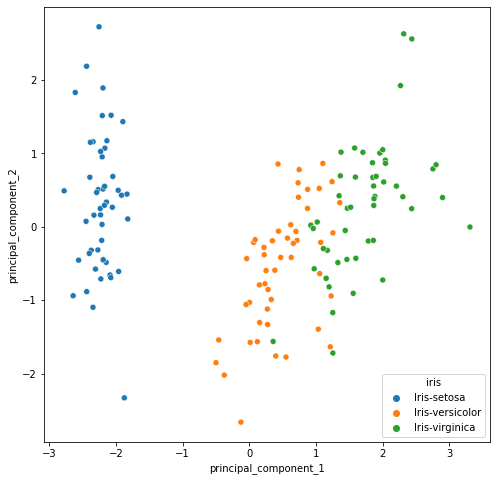

In [20]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot(data = finalDf, x = 'principal_component_1', y = 'principal_component_2', hue = 'iris')
plt.show()

### PCA explained variance

In [21]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# PCA 2

## import libraries and dataset

In [32]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [33]:
import datetime
x1 = datetime.datetime.now()
print(x1)

2021-03-28 02:35:05.453856


In [34]:
mnist = fetch_openml('mnist_784', version = 1, cache = True)

In [35]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

## Prepare data, split train and test

In [36]:
mnist.data.shape

(70000, 784)

In [37]:
mnist.target.shape

(70000,)

In [38]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data,
                                                            mnist.target,
                                                            test_size = 1/7.0,
                                                            random_state = 0
                                                            )

## Standardizing the Data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on trainig set only.
scaler.fit(train_img)

# Apply transform to both the training set and test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## PCA to Speed up Machinea Learning Algorithms (SVM)

### Step 0: Import and use PCA. After PCA I will apply a machine learning algorithm of my choice to the tranformed data

In [40]:
from sklearn.decomposition import PCA

In [41]:
# Make an instance of the Model
pca = PCA(.95)

In [42]:
# Fit PCA on training set. Note: you are fitting PCA on the training set only
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca.n_components_

327

In [44]:
# Apply the mapping (transform) to both the training set and the test set.
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

### Step 1: Import the model I want to use

In sklearn, all machine learning models are implemented as Python classes

In [45]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001,
              C = 100) # Các tham số cho mô hình hoạt  động tốt hơn

### Step 2: Training the model on the data, storing the information learned from the data

Model is learning the realtionship between x (digits) and y (labels)

In [46]:
clf.fit(train_img, train_lbl)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
y_pred = clf.predict(test_img)
y_pred

array(['0', '4', '1', ..., '1', '3', '0'], dtype=object)

Measuring Model Performance

Basically, how the  model performs on new data (test set)

In [47]:
from sklearn.metrics import accuracy_score
print("Accuracy is", accuracy_score(test_lbl, y_pred) * 100, '%')

In [48]:
score = clf.score(test_img, test_lbl)
print(score)

0.9738


### Step 3: Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [49]:
new = clf.predict(test_img[0].reshape(1, -1))
new

array(['0'], dtype=object)

In [51]:
x2 = datetime.datetime.now()
print(x2)

2021-03-28 02:44:03.966943


In [53]:
duration = x2 - x1
duration

datetime.timedelta(seconds=538, microseconds=513087)

In [54]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cumulative explained variance')

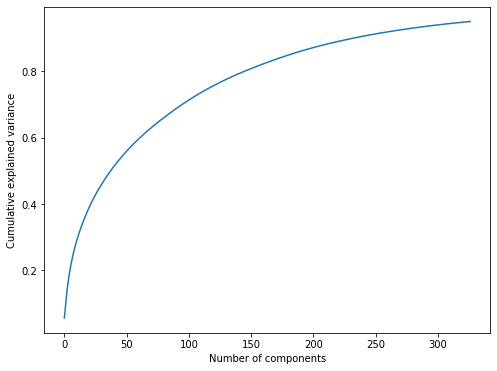

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')